In [1]:
# import libraries

import pandas as pd
pd.set_option('display.max_columns', None)
from pandas import Series, DataFrame
import numpy as np
import os
from math import sqrt
from sklearn.metrics import mean_squared_error
#import folium
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,f1_score)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xam
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")


Using TensorFlow backend.


In [2]:
data_train = pd.read_csv('train.csv')
data_test =  pd.read_csv('test.csv')
sample_sub = pd.read_csv("sample_submission2.csv")
print(data_train.shape, data_train.columns)
data_train.head()

(38312, 19) Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not'],
      dtype='object')


,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [3]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 18 columns):
EmployeeNo                             16496 non-null object
Division                               16496 non-null object
Qualification                          15766 non-null object
Gender                                 16496 non-null object
Channel_of_Recruitment                 16496 non-null object
Trainings_Attended                     16496 non-null int64
Year_of_birth                          16496 non-null int64
Last_performance_score                 16496 non-null float64
Year_of_recruitment                    16496 non-null int64
Targets_met                            16496 non-null int64
Previous_Award                         16496 non-null int64
Training_score_average                 16496 non-null int64
State_Of_Origin                        16496 non-null object
Foreign_schooled                       16496 non-null object
Marital_Status                         164

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [5]:
              ####COMPARING THE FEATURES  IN THE TRAINING SET

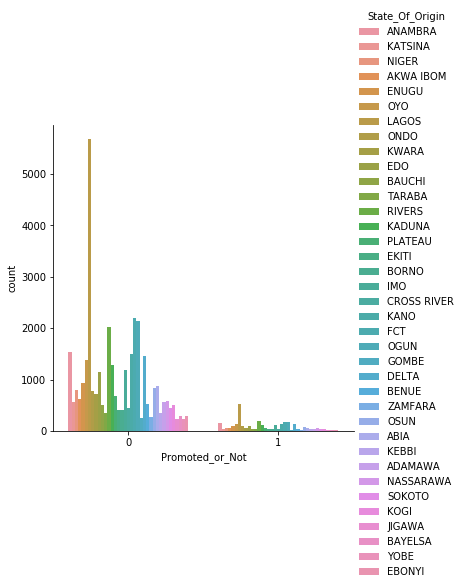

In [6]:
#We take a closer look at ('Promoted_or_Not') and ('State_Of_Origin')
sns.factorplot('Promoted_or_Not',data =data_train, kind='count', hue='State_Of_Origin')

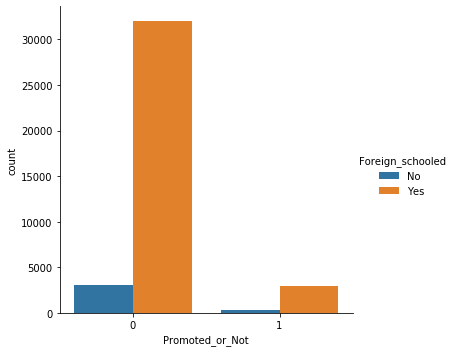

In [7]:
#We take a closer look at ('Promoted_or_Not') and ('Foreign_schooled')
sns.factorplot('Promoted_or_Not',data =data_train, kind='count', hue='Foreign_schooled')

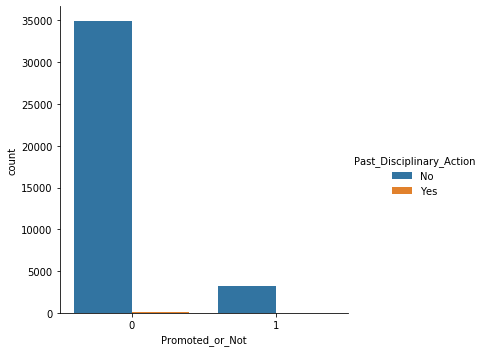

In [8]:
#We take a closer look at ('Promoted_or_Not') and ('Past_Disciplinary_Action')
sns.factorplot('Promoted_or_Not',data =data_train, kind='count', hue='Past_Disciplinary_Action')

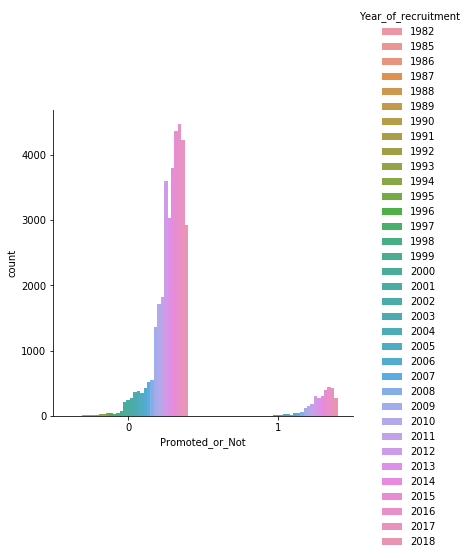

In [9]:
#We take a closer look at  ('Promoted_or_Not') and ('Year_of_recruitment')
sns.factorplot('Promoted_or_Not',data =data_train, kind='count', hue='Year_of_recruitment')

In [10]:
              ###FEATURE ENGINEERING (CREATING NEW FEATURES)

In [11]:
                    #Feature creation
data_train['Age'] = 2019 - data_train['Year_of_birth']
data_test['Age'] = 2019 - data_test['Year_of_birth']

data_train['Length_of_service'] = 2019 - data_train['Year_of_recruitment']
data_test['Length_of_service'] = 2019 - data_test['Year_of_recruitment']

data_train['Age_when_recruited'] = data_train['Year_of_recruitment'] - data_train['Year_of_birth']
data_test['Age_when_recruited'] = data_test['Year_of_recruitment'] - data_test['Year_of_birth']

data_train["Training_ret"] = data_train["Trainings_Attended"]*data_train["Last_performance_score"]
data_test["Training_ret"] = data_test["Trainings_Attended"]*data_test["Last_performance_score"]

data_train['High_last_perf_score'] = (data_train['Last_performance_score']>=7.5).astype(int)
data_test['High_last_perf_score'] = (data_test['Last_performance_score']>=7.5).astype(int)

data_train['Target_met_per_LOS'] = data_train['Targets_met']/data_train['Length_of_service']
data_test['Target_met_per_LOS'] = data_test['Targets_met']/data_test['Length_of_service']

data_train['Training_attended_per_LOS'] = data_train['Trainings_Attended']/data_train['Length_of_service']
data_test['Training_attended_per_LOS'] = data_test['Trainings_Attended']/data_test['Length_of_service']


In [12]:
 ####REMOVING IRRELEVANT FEATURES
data_train = data_train.drop(["EmployeeNo"], axis = 1)
data_test = data_test.drop(["EmployeeNo"], axis = 1)

In [13]:
                      ###REPLACING MISSING VALUES

In [14]:


# first let's replace all possible inf and -inf values with nan
data_train = data_train.replace([np.inf, -np.inf], np.nan)
data_test =data_test.replace([np.inf, -np.inf], np.nan)

#check for missing data
data_train.isnull().sum()

Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
Age                                       0
Length_of_service                         0
Age_when_recruited                        0
Training_ret                              0
High_last_perf_score            

In [15]:
##fill missing qualification with the most popular class
data_train['Qualification'] = data_train['Qualification'].fillna("First Degree or HND")
data_test['Qualification'] = data_test['Qualification'].fillna("First Degree or HND")

#replacing values 
data_train['Marital_Status'] = data_train['Marital_Status'].replace(['Not_Sure'], data_train['Marital_Status'].mode())
data_test['Marital_Status'] = data_test['Marital_Status'].replace(['Not_Sure'], data_test['Marital_Status'].mode())

In [16]:
              ####SELECTING CATEGORICAL FEATURES

In [18]:
# Preparing for Mean Encoding
categ_col = data_train.select_dtypes(exclude=['int64','float64']).columns
categ_col = list(categ_col)
categ_col = data_test.select_dtypes(exclude=['int64','float64']).columns
categ_col = list(categ_col)

numb_col = data_train.select_dtypes(exclude=['object']).columns
numb_col = list(numb_col)
numb_col = data_test.select_dtypes(exclude=['object']).columns
numb_col = list(numb_col)

In [19]:
#Performing Mean Encoding on all the categorical features
xam_it = xam.feature_extraction.BayesianTargetEncoder(columns=categ_col)

y = data_train['Promoted_or_Not']
train_x = data_train.drop('Promoted_or_Not', axis=1)
xam_it.fit(train_x, y)

train_x = xam_it.transform(train_x)
test_x = xam_it.transform(data_test)

In [20]:
train_x.drop(columns= categ_col, inplace=True)
test_x.drop(columns= categ_col, inplace=True)

In [21]:
train_x.shape, test_x.shape

((38312, 24), (16496, 24))

In [22]:
                ##CHECKING FOR IMBALANCED DATA

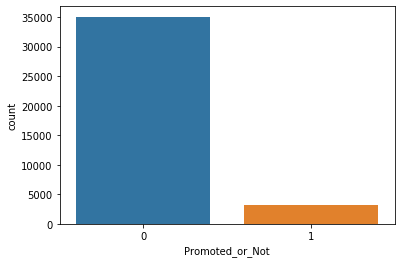

In [23]:
sns.countplot(y) #To check if the data is balanced

In [24]:
                    ##BALANCING THE DATA   (OVER SAMPLING)

In [25]:
#splitting the training data
xtrain, xtest, ytrain, ytest = train_test_split(train_x, y, test_size=0.3, random_state=42)

In [26]:
sm = SMOTE(random_state=42, ratio = 1.0)
xresample, yresample = sm.fit_resample(xtrain,ytrain)

In [27]:
xtrain = xresample
ytrain = yresample

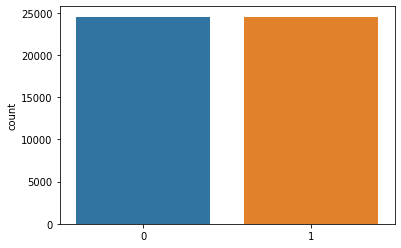

In [28]:
sns.countplot(ytrain)

In [29]:
                        ###SCALING

In [30]:
# APPLYING SCALING 
scale = StandardScaler()

scale.fit(xtrain)
xtrain = scale.transform(xtrain)
xtest = scale.transform(xtest)

In [31]:
                  #####MODELLING THE TRAIN DATA

In [32]:
# # # With XGBoost
xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)
xgb_pred = xgb.predict(xtest)
print('F1 score:' ,f1_score(ytest, xgb_pred))

F1 score: 0.2756302521008403


In [33]:
                ###SCALING DATA

In [34]:
scale.fit(train_x)
train = scale.transform(train_x)
test = scale.transform(test_x)

In [35]:
                         ##HYPER PARAMETER TUNING

In [36]:
# using gridsearch & cross validation, hypertune best parameters 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model = XGBClassifier()
grid = {#'n_estimators': [10,20,30],
        #'max_leaf_nodes':[1,0]
        #'min_impurity_split':[1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,80,90,100],
        #'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,80,90,100]
        #'max_features':[10],
        #'min_weight_fraction_leaf':[0,0.5]
        #'random_state':[1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,80,90,100]
        'max_depth': [1,2,3,4,5,6]
       
        #'learning_rate' : [0.5,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7]
}
cv = KFold(n_splits = 10, shuffle=True, random_state = 100)
clf = GridSearchCV(model, grid, n_jobs=8, cv=cv,scoring='f1_micro')
clf.fit(train_x, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=8, param_grid={'max_depth': [1, 2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train

In [37]:
clf.best_score_, clf.best_params_

(0.941741490916684, {'max_depth': 6})

In [38]:
predictions1 = clf.predict(data_test)

In [39]:
predictions1

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
samp = pd.read_csv('sample_submission2.csv')
temp = pd.read_csv('test.csv')

samp['EmployeeNo'] = temp['EmployeeNo']
samp['Promoted_or_Not'] = predictions1.astype('int64')

In [41]:
#  value counts for our new prediction
samp['Promoted_or_Not'].value_counts()

0    15998
1      498
Name: Promoted_or_Not, dtype: int64

In [42]:
samp.to_csv("hazard3.csv", index=False)